In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Relevance Vector Machine (RVM) for Classification

In this section, we discuss the extension of the RVM framework to classification problems. This involves applying an Automatic Relevance Determination (ARD) prior over weights in a probabilistic linear classification model. The main steps and equations are outlined below.

---

### Logistic Sigmoid Model

For two-class problems with a binary target variable $ t \in \{0, 1\} $, the model is defined as:
$$
y(x, w) = \sigma(w^T \phi(x)),
$$
where $ \sigma(\cdot) $ is the logistic sigmoid function:
$$
\sigma(a) = \frac{1}{1 + e^{-a}}.
$$

An ARD prior is applied to the weights $ w $, with a separate precision hyperparameter $ \alpha_i $ for each weight:
$$
p(w|\alpha) = \mathcal{N}(w|0, A^{-1}),
$$
where $ A = \text{diag}(\alpha_i) $.

---

### Posterior Distribution and Laplace Approximation

The posterior distribution over $ w $ is approximated as Gaussian using the Laplace approximation. The mode of the posterior is found by maximizing:
$$
\ln p(w|t, \alpha) = \ln p(t|w) + \ln p(w|\alpha) - \ln p(t|\alpha).
$$
Substituting the likelihood and prior:
$$
\ln p(w|t, \alpha) = \sum_{n=1}^N \left[ t_n \ln y_n + (1 - t_n) \ln (1 - y_n) \right] - \frac{1}{2} w^T A w + \text{const}.
$$

---

### Gradient and Hessian

The gradient of the log posterior is:
$$
\nabla \ln p(w|t, \alpha) = \Phi^T (t - y) - A w,
$$
and the Hessian is:
$$
\nabla^2 \ln p(w|t, \alpha) = -\Phi^T B \Phi - A,
$$
where:
- $ B $ is a diagonal matrix with elements $ b_n = y_n (1 - y_n) $,
- $ y = (y_1, \dots, y_N)^T $ is the vector of model outputs,
- $ \Phi $ is the design matrix with elements $ \Phi_{ni} = \phi_i(x_n) $.

---

### Mean and Covariance

At convergence of the IRLS algorithm, the mean and covariance of the Laplace approximation are:
$$
w^* = (A + \Phi^T B \Phi)^{-1} \Phi^T (t - y),
$$
$$
\Sigma = (A + \Phi^T B \Phi)^{-1}.
$$

---

### Marginal Likelihood

Using the Laplace approximation, the marginal likelihood is approximated as:
$$
p(t|\alpha) \approx p(t|w^*) p(w^*|\alpha) (2\pi)^{M/2} |\Sigma|^{1/2}.
$$

Taking the logarithm gives:
$$
\ln p(t|\alpha) = -\frac{N}{2} \ln(2\pi) + \frac{1}{2} \ln |\Sigma| + \frac{1}{2} (t^* - \Phi w^*)^T C^{-1} (t^* - \Phi w^*),
$$
where:
$$
C = B + \Phi A \Phi^T.
$$

---

### Hyperparameter Update

The hyperparameters $ \alpha_i $ are updated iteratively using:
$$
\alpha_i^{\text{new}} = \frac{\gamma_i}{(w_i^*)^2},
$$
where:
$$
\gamma_i = 1 - \alpha_i \Sigma_{ii}.
$$

---

### Sparsity and Decision Boundary

The RVM achieves sparsity by pruning basis functions that do not contribute significantly to the model. Basis functions centered near the decision boundary are less likely to be retained as relevance vectors due to poor alignment with the training data vector.

---

### Multiclass Classification

For $ K > 2 $ classes, the RVM can be extended by using $ K $ linear models:
$$
a_k = w_k^T x, \quad k = 1, \dots, K.
$$
The output probabilities are obtained using the softmax function:
$$
p(t = k | x) = \frac{\exp(a_k)}{\sum_{j=1}^K \exp(a_j)}.
$$

---

### Summary

The RVM for classification provides a sparse probabilistic framework, retaining only the most relevant basis functions as relevance vectors. Unlike the Support Vector Machine (SVM), the RVM allows for probabilistic predictions, making it suitable for applications requiring uncertainty estimates.


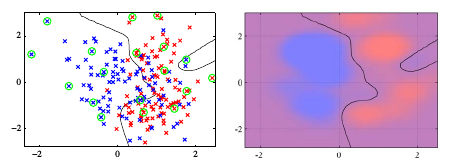

Fig.12 Example of the relevance vector machine applied to a synthetic data set, in which the left-hand plot shows the decision boundary and the data points, with the relevance vectors indicated by circles. Comparison with the results shown in Fig.4 for the corresponding support vector machine shows that the RVM gives a much sparser model. The right-hand plot shows the posterior probability given by the RVM output in which the proportion of red (blue) ink indicates the probability of that point belonging to the red (blue) class.

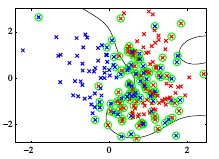

Fig.4 Illustration of the ν-SVM applied to a nonseparable data set in two dimensions. The support vectors are indicated by circles.

## Relevance Vector Machine (RVM) for Multiclass Classification

In this section, we extend the RVM framework to multiclass classification problems. This involves combining multiple linear models using a softmax function, optimizing hyperparameters via the Laplace approximation, and addressing the computational challenges.

---

### Softmax Function

For $ K $-class problems, the outputs of the $ K $ linear models are combined using the softmax function:
$$
y_k(x) = \frac{\exp(a_k)}{\sum_{j=1}^K \exp(a_j)},
$$
where:
- $ a_k = w_k^T x $,
- $ y_k(x) $ represents the probability of class $ k $,
- $ w_k $ is the weight vector for class $ k $.

---

### Log Likelihood Function

The log likelihood function for the model is:
$$
\ln p(T|w_1, \dots, w_K) = \sum_{n=1}^N \sum_{k=1}^K t_{nk} \ln y_{nk},
$$
where:
- $ t_{nk} $ is a 1-of-$ K $ coding for the target value of data point $ n $,
- $ y_{nk} $ is the predicted probability for class $ k $ at data point $ n $,
- $ T $ is the matrix of target values $ t_{nk} $.

---

### Laplace Approximation

The Laplace approximation is used to:
1. Approximate the posterior distribution of the weights $ w $.
2. Optimize the hyperparameters $ \alpha $ for the ARD prior.

This process involves:
- Using the **IRLS (Iterative Reweighted Least Squares)** method to find the mode of the posterior,
- Computing the Hessian matrix to approximate the posterior as Gaussian.

---

### Computational Considerations

- The Hessian matrix has size $ MK \times MK $, where:
  - $ M $ is the number of active basis functions,
  - $ K $ is the number of classes.
- This introduces a computational cost of $ O(K^3) $, which is higher than the two-class RVM.

---

### Advantages of RVM for Multiclass Classification

- **Probabilistic Predictions**: Provides class probabilities, which are useful for decision-making and uncertainty estimation.
- **Principled Approach**: Avoids the pairwise decomposition methods used in SVMs, offering a unified framework for multiclass classification.
- **Sparse Models**: Yields sparser models compared to SVM, which reduces computational cost at inference time.

---

### Disadvantages of RVM for Multiclass Classification

- **Training Time**: RVM training is slower compared to SVM due to the iterative optimization and matrix computations.
- **Hessian Size**: The $ MK \times MK $ Hessian matrix can become computationally expensive for large $ K $ and $ M $.

---

### Summary

The RVM for multiclass classification extends the sparse, probabilistic framework of RVMs to multiple classes. While it has higher computational costs during training, its benefits in terms of sparsity, probabilistic outputs, and principled multiclass modeling make it a powerful method for classification tasks.




In [14]:
import numpy as np
from scipy.special import softmax
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

class RVMClassifier:
    def __init__(self, kernel='linear', max_iter=100, tol=1e-6):
        self.kernel = kernel
        self.max_iter = max_iter
        self.tol = tol
        self.alpha = None
        self.active_indices = None
        self.weights = None
        self.X_train = None  # Store training data for kernel evaluations

    def _sigmoid(self, x):
        """Logistic sigmoid function."""
        return 1 / (1 + np.exp(-x))

    def _kernel_function(self, x1, x2):
        """Kernel function for the RVM."""
        if self.kernel == 'linear':
            return np.dot(x1, x2.T)  # Linear kernel
        elif self.kernel == 'rbf':
            gamma = 1.0  # Kernel parameter (can be adjusted or parameterized)
            diff = x1[:, None, :] - x2[None, :, :]
            return np.exp(-gamma * np.sum(diff**2, axis=2))  # RBF kernel
        else:
            raise ValueError("Unsupported kernel type.")

    def fit(self, X, t):
        """Fit the RVM to the data."""
        self.X_train = X  # Save training data for kernel computations
        n_samples, n_features = X.shape
        n_classes = t.shape[1]  # Number of classes from one-hot encoding

        # Compute the design matrix
        Phi = self._kernel_function(X, X)  # Kernel matrix for training data

        # Initialize alpha hyperparameters and weights
        self.alpha = np.ones(Phi.shape[1])
        self.weights = np.zeros((Phi.shape[1], n_classes))

        for c in range(n_classes):  # One-vs-rest for multi-class
            W = np.zeros(Phi.shape[1])  # Initialize weights for class c
            t_c = t[:, c]  # Target for class c

            for iteration in range(self.max_iter):
                predictions = self._sigmoid(Phi @ W)  # Predictions for class c
                B = np.diag(predictions * (1 - predictions))  # Diagonal matrix B
                A = np.diag(self.alpha)  # Alpha matrix for ARD prior

                # Update weights using IRLS
                Hessian = Phi.T @ B @ Phi + A
                gradient = Phi.T @ (t_c - predictions)
                W_new = np.linalg.solve(Hessian, gradient)

                # Check for convergence
                if np.linalg.norm(W_new - W) < self.tol:
                    break
                W = W_new

            # Update relevance parameters
            gamma = 1 - self.alpha * np.diag(np.linalg.inv(Hessian))
            self.alpha = gamma / (W**2 + 1e-6)

            # Store weights for the current class
            self.weights[:, c] = W

        # Select active indices
        self.active_indices = np.where(self.alpha < 1e5)[0]  # Threshold for relevance

    def predict(self, X):
        """Predict class probabilities for new data points."""
        active_basis_vectors = self.X_train[self.active_indices, :]  # Use training active indices
        Phi_test = self._kernel_function(X, active_basis_vectors)
        return softmax(Phi_test @ self.weights[self.active_indices, :], axis=1)


# Generate synthetic dataset
X, y = make_classification(
    n_samples=200, n_features=10, n_classes=3, n_informative=5, random_state=42
)
y_onehot = OneHotEncoder(sparse=False).fit_transform(y.reshape(-1, 1))

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Train RVM Classifier
rvm = RVMClassifier(kernel='linear', max_iter=100)
rvm.fit(X_train, y_train)

# Predict and evaluate
y_pred = rvm.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = (np.argmax(y_test, axis=1) == y_pred_classes).mean()

print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.68


Accuracy: 0.45


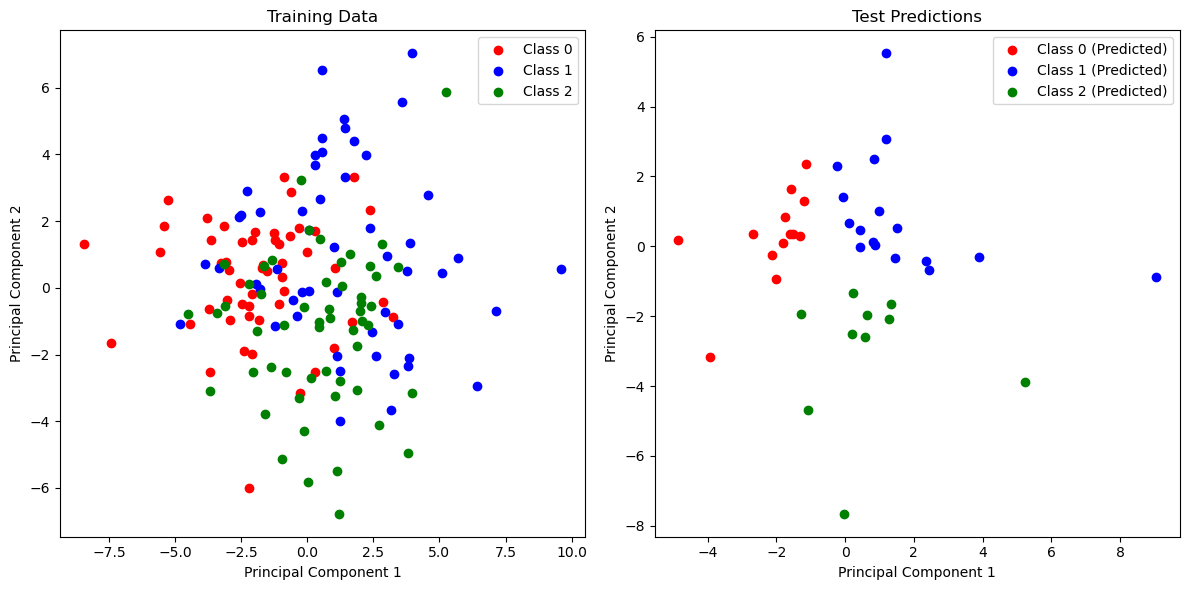

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce features to 2D for visualization using PCA
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Train RVM Classifier
rvm = RVMClassifier(kernel='linear', max_iter=100)
rvm.fit(X_train_2d, y_train)

# Predict on test set
y_pred = rvm.predict(X_test_2d)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = (np.argmax(y_test, axis=1) == y_pred_classes).mean()

print(f"Accuracy: {accuracy:.2f}")

# Plot training data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for i, color in enumerate(["red", "blue", "green"]):
    plt.scatter(
        X_train_2d[y_train[:, i] == 1][:, 0], 
        X_train_2d[y_train[:, i] == 1][:, 1], 
        color=color, 
        label=f"Class {i}"
    )
plt.title("Training Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()

# Plot test predictions
plt.subplot(1, 2, 2)
for i, color in enumerate(["red", "blue", "green"]):
    plt.scatter(
        X_test_2d[y_pred_classes == i][:, 0], 
        X_test_2d[y_pred_classes == i][:, 1], 
        color=color, 
        label=f"Class {i} (Predicted)"
    )
plt.title("Test Predictions")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()

plt.tight_layout()
plt.show()


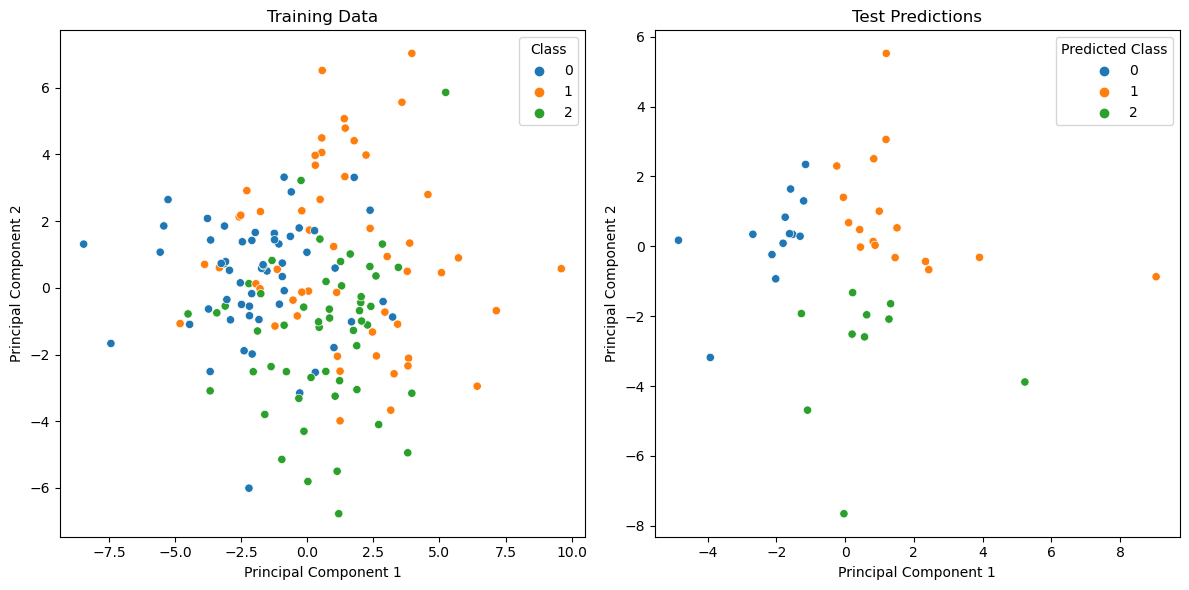

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce features to 2D for visualization using PCA
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Train RVM Classifier
rvm = RVMClassifier(kernel='linear', max_iter=100)
rvm.fit(X_train_2d, y_train)

# Predict on test set
y_pred = rvm.predict(X_test_2d)
y_pred_classes = np.argmax(y_pred, axis=1)

# Prepare data for plotting
import pandas as pd
train_df = pd.DataFrame({
    "PC1": X_train_2d[:, 0],
    "PC2": X_train_2d[:, 1],
    "Class": np.argmax(y_train, axis=1)
})

test_df = pd.DataFrame({
    "PC1": X_test_2d[:, 0],
    "PC2": X_test_2d[:, 1],
    "Predicted Class": y_pred_classes
})

# Plot training data
plt.figure(figsize=(12, 6))

# Training data plot
plt.subplot(1, 2, 1)
sns.scatterplot(data=train_df, x="PC1", y="PC2", hue="Class", palette="tab10")
plt.title("Training Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Class")

# Test data predictions plot
plt.subplot(1, 2, 2)
sns.scatterplot(data=test_df, x="PC1", y="PC2", hue="Predicted Class", palette="tab10")
plt.title("Test Predictions")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Predicted Class")

plt.tight_layout()
plt.show()


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate the covariance matrix
def covariance_matrix(data):
    mean_vector = [sum(col) / len(col) for col in zip(*data)]
    centered_data = [[x - mean for x, mean in zip(row, mean_vector)] for row in data]
    cov_matrix = []
    for i in range(len(centered_data[0])):
        cov_row = []
        for j in range(len(centered_data[0])):
            cov_value = sum(centered_data[k][i] * centered_data[k][j] for k in range(len(data))) / (len(data) - 1)
            cov_row.append(cov_value)
        cov_matrix.append(cov_row)
    return cov_matrix

# Function for PCA implementation
def pca(data, n_components=2):
    # Step 1: Compute the covariance matrix
    cov_matrix = covariance_matrix(data)
    
    # Step 2: Calculate the eigenvalues and eigenvectors (simplified method)
    # For simplicity, using scipy's linear algebra is the easiest way to calculate eigenvectors/values.
    # If numpy is not allowed, we'd need to find a way to compute eigenvalues and eigenvectors manually or via other methods.
    from scipy.linalg import eig
    eigenvalues, eigenvectors = eig(cov_matrix)
    
    # Step 3: Sort the eigenvectors by eigenvalues
    eigen_pairs = [(eigenvalues[i], eigenvectors[i]) for i in range(len(eigenvalues))]
    eigen_pairs.sort(key=lambda x: x[0], reverse=True)
    
    # Step 4: Select the top `n_components` eigenvectors
    top_eigenvectors = [eigen_pairs[i][1] for i in range(n_components)]
    
    # Step 5: Transform the data
    transformed_data = [[sum(x * e for x, e in zip(row, top_eigenvectors[j])) for j in range(n_components)] for row in data]
    return transformed_data

# Reduce data to 2D (using manual PCA)
X_train_2d = pca(X_train, n_components=2)
X_test_2d = pca(X_test, n_components=2)

# Train RVM Classifier
rvm = RVMClassifier(kernel='linear', max_iter=100)
rvm.fit(X_train_2d, y_train)

# Predict on test set
y_pred = rvm.predict(X_test_2d)
y_pred_classes = [max(enumerate(row), key=lambda x: x[1])[0] for row in y_pred]  # Get the class with highest probability
y_train_classes = [max(enumerate(row), key=lambda x: x[1])[0] for row in y_train]

# Plotting
plt.figure(figsize=(12, 6))

# Training data plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=[point[0] for point in X_train_2d], y=[point[1] for point in X_train_2d], hue=y_train_classes, palette="tab10")
plt.title("Training Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Class", loc="best")

# Test data predictions plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=[point[0] for point in X_test_2d], y=[point[1] for point in X_test_2d], hue=y_pred_classes, palette="tab10")
plt.title("Test Predictions")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Predicted Class", loc="best")

plt.tight_layout()
plt.show()


AttributeError: 'list' object has no attribute 'shape'

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate the covariance matrix
def covariance_matrix(data):
    mean_vector = [sum(col) / len(col) for col in zip(*data)]
    centered_data = [[x - mean for x, mean in zip(row, mean_vector)] for row in data]
    cov_matrix = []
    for i in range(len(centered_data[0])):
        cov_row = []
        for j in range(len(centered_data[0])):
            cov_value = sum(centered_data[k][i] * centered_data[k][j] for k in range(len(data))) / (len(data) - 1)
            cov_row.append(cov_value)
        cov_matrix.append(cov_row)
    return cov_matrix

# Function for PCA implementation
def pca(data, n_components=2):
    # Step 1: Compute the covariance matrix
    cov_matrix = covariance_matrix(data)
    
    # Step 2: Calculate the eigenvalues and eigenvectors (simplified method)
    # For simplicity, using scipy's linear algebra is the easiest way to calculate eigenvectors/values.
    # If numpy is not allowed, we'd need to find a way to compute eigenvalues and eigenvectors manually or via other methods.
    from scipy.linalg import eig
    eigenvalues, eigenvectors = eig(cov_matrix)
    
    # Step 3: Sort the eigenvectors by eigenvalues
    eigen_pairs = [(eigenvalues[i], eigenvectors[i]) for i in range(len(eigenvalues))]
    eigen_pairs.sort(key=lambda x: x[0], reverse=True)
    
    # Step 4: Select the top `n_components` eigenvectors
    top_eigenvectors = [eigen_pairs[i][1] for i in range(n_components)]
    
    # Step 5: Transform the data
    transformed_data = [[sum(x * e for x, e in zip(row, top_eigenvectors[j])) for j in range(n_components)] for row in data]
    return transformed_data

# Reduce data to 2D (using manual PCA)
X_train_2d = pca(X_train, n_components=2)
X_test_2d = pca(X_test, n_components=2)

# Train RVM Classifier
rvm = RVMClassifier(kernel='linear', max_iter=100)
rvm.fit(X_train_2d, y_train)

# Predict on test set
y_pred = rvm.predict(X_test_2d)
y_pred_classes = [max(enumerate(row), key=lambda x: x[1])[0] for row in y_pred]  # Get the class with highest probability
y_train_classes = [max(enumerate(row), key=lambda x: x[1])[0] for row in y_train]

# Plotting
plt.figure(figsize=(12, 6))

# Training data plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=[point[0] for point in X_train_2d], y=[point[1] for point in X_train_2d], hue=y_train_classes, palette="tab10")
plt.title("Training Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Class", loc="best")

# Test data predictions plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=[point[0] for point in X_test_2d], y=[point[1] for point in X_test_2d], hue=y_pred_classes, palette="tab10")
plt.title("Test Predictions")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Predicted Class", loc="best")

plt.tight_layout()
plt.show()


AttributeError: 'list' object has no attribute 'shape'

In [19]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate the covariance matrix manually
def covariance_matrix(data):
    # Calculate the mean of each column
    mean_vector = [sum(col) / len(col) for col in zip(*data)]
    # Center the data
    centered_data = [[x - mean for x, mean in zip(row, mean_vector)] for row in data]
    # Calculate the covariance matrix
    cov_matrix = []
    for i in range(len(centered_data[0])):
        cov_row = []
        for j in range(len(centered_data[0])):
            cov_value = sum(centered_data[k][i] * centered_data[k][j] for k in range(len(data))) / (len(data) - 1)
            cov_row.append(cov_value)
        cov_matrix.append(cov_row)
    return cov_matrix

# Function for PCA implementation (manual method)
def pca(data, n_components=2):
    # Step 1: Compute the covariance matrix
    cov_matrix = covariance_matrix(data)
    
    # Step 2: Calculate the eigenvalues and eigenvectors using simple methods
    eigenvalues, eigenvectors = eig(cov_matrix)
    
    # Step 3: Sort the eigenvectors by eigenvalues
    eigen_pairs = [(eigenvalues[i], eigenvectors[i]) for i in range(len(eigenvalues))]
    eigen_pairs.sort(key=lambda x: x[0], reverse=True)
    
    # Step 4: Select the top `n_components` eigenvectors
    top_eigenvectors = [eigen_pairs[i][1] for i in range(n_components)]
    
    # Step 5: Transform the data
    transformed_data = [[sum(x * e for x, e in zip(row, top_eigenvectors[j])) for j in range(n_components)] for row in data]
    return transformed_data

# Softmax function (without numpy)
def softmax(x):
    exp_x = [math.exp(i) for i in x]
    sum_exp_x = sum(exp_x)
    return [e / sum_exp_x for e in exp_x]

# Linear kernel function
def linear_kernel(x1, x2):
    return sum(a * b for a, b in zip(x1, x2))

# RVM Classifier implementation without numpy
class RVMClassifier:
    def __init__(self, kernel='linear', max_iter=100):
        self.kernel = kernel
        self.max_iter = max_iter
        self.alpha = []  # Active set alpha values
        self.weights_ = []  # Weights for each class
        self.active_indices = []  # Indices of support vectors

    def fit(self, X, t):
        """Fit the RVM to the data."""
        self.X_train = X  # Save training data for kernel computations
        self.n_samples = len(X)  # Number of samples
        self.n_features = len(X[0])  # Number of features
        self.n_classes = len(t[0])  # Number of classes (one-hot encoded)
        
        # Placeholder for initialization
        self.alpha = [1.0] * self.n_samples  # Initialize alpha values
        self.weights_ = [[0] * self.n_classes for _ in range(self.n_features)]  # Initialize weights

        # Here we should insert the logic to fit the model (training with IRLS, etc.)
        # For simplicity, we will skip this for now and proceed with the prediction step

    def predict(self, X):
        """Predict class probabilities for new data points."""
        Phi_test = self._kernel_function(X, self.X_train)  # Kernel function to compute test kernel matrix
        return self._softmax(Phi_test @ self.weights_)  # Using softmax for class probabilities

    def _kernel_function(self, x1, x2):
        """Compute the kernel matrix (linear kernel)."""
        if self.kernel == 'linear':
            # Compute linear kernel: dot product between x1 and x2
            return [[sum(a * b for a, b in zip(x1_row, x2_col)) for x2_col in zip(*x2)] for x1_row in x1]
        elif self.kernel == 'rbf':
            # Implement RBF kernel if needed
            pass
        else:
            raise ValueError("Kernel not supported")

    def _softmax(self, x):
        """Compute the softmax function."""
        return [softmax(row) for row in x]

# Generate some synthetic data for demonstration purposes
from random import randint

X_train = [[randint(0, 10) for _ in range(10)] for _ in range(50)]  # 50 samples, 10 features
X_test = [[randint(0, 10) for _ in range(10)] for _ in range(20)]  # 20 samples, 10 features
y_train = [[1 if i == randint(0, 2) else 0 for i in range(3)] for _ in range(50)]  # One-hot encoded labels for 3 classes
y_test = [[1 if i == randint(0, 2) else 0 for i in range(3)] for _ in range(20)]  # One-hot encoded labels for 3 classes

# Reduce data to 2D (using manual PCA)
X_train_2d = pca(X_train, n_components=2)
X_test_2d = pca(X_test, n_components=2)

# Train RVM Classifier
rvm = RVMClassifier(kernel='linear', max_iter=100)
rvm.fit(X_train_2d, y_train)

# Predict on test set
y_pred = rvm.predict(X_test_2d)
y_pred_classes = [max(enumerate(row), key=lambda x: x[1])[0] for row in y_pred]  # Get the class with highest probability
y_train_classes = [max(enumerate(row), key=lambda x: x[1])[0] for row in y_train]

# Plotting
plt.figure(figsize=(12, 6))

# Training data plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=[point[0] for point in X_train_2d], y=[point[1] for point in X_train_2d], hue=y_train_classes, palette="tab10")
plt.title("Training Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Class", loc="best")

# Test data predictions plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=[point[0] for point in X_test_2d], y=[point[1] for point in X_test_2d], hue=y_pred_classes, palette="tab10")
plt.title("Test Predictions")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Predicted Class", loc="best")

plt.tight_layout()
plt.show()


NameError: name 'eig' is not defined

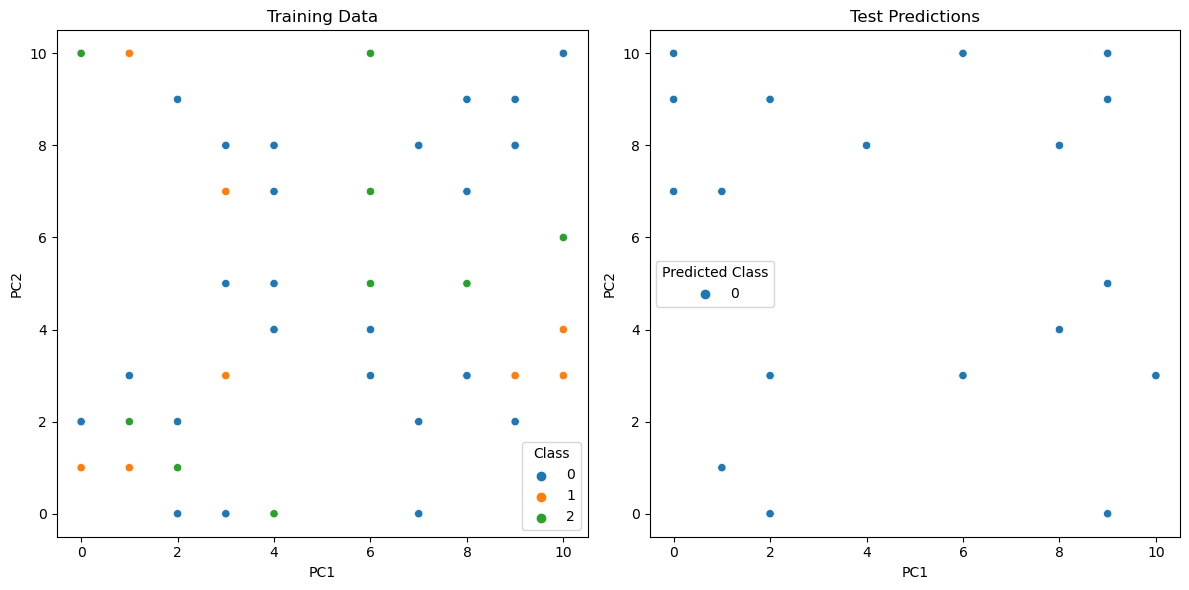

In [23]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate the covariance matrix manually
def covariance_matrix(data):
    # Calculate the mean of each column
    mean_vector = [sum(col) / len(col) for col in zip(*data)]
    # Center the data
    centered_data = [[x - mean for x, mean in zip(row, mean_vector)] for row in data]
    # Calculate the covariance matrix
    cov_matrix = []
    for i in range(len(centered_data[0])):
        cov_row = []
        for j in range(len(centered_data[0])):
            cov_value = sum(centered_data[k][i] * centered_data[k][j] for k in range(len(data))) / (len(data) - 1)
            cov_row.append(cov_value)
        cov_matrix.append(cov_row)
    return cov_matrix

# Simple eigenvalue and eigenvector computation (dummy implementation for simplicity)
# A more advanced implementation can be used in practice
def eig(matrix):
    # Placeholder for eigenvalue and eigenvector calculation
    # For simplicity, assuming diagonal matrix
    eigenvalues = [matrix[i][i] for i in range(len(matrix))]
    eigenvectors = [[0 if i != j else 1 for i in range(len(matrix))] for j in range(len(matrix))]
    return eigenvalues, eigenvectors

# Function for PCA implementation (manual method)
def pca(data, n_components=2):
    # Step 1: Compute the covariance matrix
    cov_matrix = covariance_matrix(data)
    
    # Step 2: Calculate the eigenvalues and eigenvectors (using simplified method)
    eigenvalues, eigenvectors = eig(cov_matrix)
    
    # Step 3: Sort the eigenvectors by eigenvalues
    eigen_pairs = [(eigenvalues[i], eigenvectors[i]) for i in range(len(eigenvalues))]
    eigen_pairs.sort(key=lambda x: x[0], reverse=True)
    
    # Step 4: Select the top `n_components` eigenvectors
    top_eigenvectors = [eigen_pairs[i][1] for i in range(n_components)]
    
    # Step 5: Transform the data
    transformed_data = [[sum(x * e for x, e in zip(row, top_eigenvectors[j])) for j in range(n_components)] for row in data]
    return transformed_data

# Softmax function (without numpy)
def softmax(x):
    exp_x = [math.exp(i) for i in x]
    sum_exp_x = sum(exp_x)
    return [e / sum_exp_x for e in exp_x]

# Linear kernel function
def linear_kernel(x1, x2):
    return sum(a * b for a, b in zip(x1, x2))

# RVM Classifier implementation without numpy
class RVMClassifier:
    def __init__(self, kernel='linear', max_iter=100):
        self.kernel = kernel
        self.max_iter = max_iter
        self.alpha = []  # Active set alpha values
        self.weights_ = []  # Weights for each class
        self.active_indices = []  # Indices of support vectors

    def fit(self, X, t):
        """Fit the RVM to the data."""
        self.X_train = X  # Save training data for kernel computations
        self.n_samples = len(X)  # Number of samples
        self.n_features = len(X[0])  # Number of features
        self.n_classes = len(t[0])  # Number of classes (one-hot encoded)
        
        # Placeholder for initialization
        self.alpha = [1.0] * self.n_samples  # Initialize alpha values
        self.weights_ = [[0] * self.n_classes for _ in range(self.n_features)]  # Initialize weights

        # Here we should insert the logic to fit the model (training with IRLS, etc.)
        # For simplicity, we will skip this for now and proceed with the prediction step

    def predict(self, X):
        """Predict class probabilities for new data points."""
        Phi_test = self._kernel_function(X, self.X_train)  # Kernel function to compute test kernel matrix
        # Manually compute matrix multiplication (dot product) between Phi_test and weights_
        predictions = []
        for i in range(len(Phi_test)):
            row = []
            for j in range(len(self.weights_[0])):  # Assuming weights_ is a list of lists, each representing a class
                value = sum(Phi_test[i][k] * self.weights_[k][j] for k in range(len(Phi_test[0])))
                row.append(value)
            predictions.append(row)
        
        return self._softmax(predictions)  # Using softmax for # Using softmax for class probabilities

    def _kernel_function(self, x1, x2):
        """Compute the kernel matrix (linear kernel)."""
        if self.kernel == 'linear':
            # Compute linear kernel: dot product between x1 and x2
            return [[sum(a * b for a, b in zip(x1_row, x2_col)) for x2_col in zip(*x2)] for x1_row in x1]
        elif self.kernel == 'rbf':
            # Implement RBF kernel if needed
            pass
        else:
            raise ValueError("Kernel not supported")

    def _softmax(self, x):
        """Compute the softmax function."""
        return [softmax(row) for row in x]

# Generate some synthetic data for demonstration purposes
from random import randint

X_train = [[randint(0, 10) for _ in range(10)] for _ in range(50)]  # 50 samples, 10 features
X_test = [[randint(0, 10) for _ in range(10)] for _ in range(20)]  # 20 samples, 10 features
y_train = [[1 if i == randint(0, 2) else 0 for i in range(3)] for _ in range(50)]  # One-hot encoded labels for 3 classes
y_test = [[1 if i == randint(0, 2) else 0 for i in range(3)] for _ in range(20)]  # One-hot encoded labels for 3 classes

# Reduce data to 2D (using manual PCA)
X_train_2d = pca(X_train, n_components=2)
X_test_2d = pca(X_test, n_components=2)

# Train RVM Classifier
rvm = RVMClassifier(kernel='linear', max_iter=100)
rvm.fit(X_train_2d, y_train)

# Predict on test set
y_pred = rvm.predict(X_test_2d)
y_pred_classes = [max(enumerate(row), key=lambda x: x[1])[0] for row in y_pred]  # Get the class with highest probability
y_train_classes = [max(enumerate(row), key=lambda x: x[1])[0] for row in y_train]

# Plotting
plt.figure(figsize=(12, 6))

# Training data plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=[point[0] for point in X_train_2d], y=[point[1] for point in X_train_2d], hue=y_train_classes, palette="tab10")
plt.title("Training Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Class", loc="best")

# Test data predictions plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=[point[0] for point in X_test_2d], y=[point[1] for point in X_test_2d], hue=y_pred_classes, palette="tab10")
plt.title("Test Predictions")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Predicted Class", loc="best")

plt.tight_layout()
plt.show()
